### 0. Imports

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import pandas_ta as ta
import datetime
from xgboost import XGBRegressor, plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error

### 1. Read data into Dataframe

In [81]:
df = pd.read_csv('../../long_short_local/raw_data/cleaned_data.csv')

### 2. Prepare data

#### 2.1 Add SMA (simple moving average)

In [82]:
# convert 'Date' column to datetime values
df['Date'] = pd.to_datetime(df['Date'].str[:10])

In [8]:
# iterate over the list of columns to compute SMA
for ratio in df.columns:
    sma10 = pd.DataFrame(ta.sma(df[[ratio]], length=10))
    print(sma10.head(2))
    #new_df = pd.concat([new_df, sma10], axis=1, ignore_index=False)
    

Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []


In [272]:
df = pd.read_csv('../../long_short_local/raw_data/cleaned_data.csv')

In [273]:
# convert 'Date' column to datetime values
df['Date'] = pd.to_datetime(df['Date'].str[:10])

In [274]:
sma_10_df_prep = pd.DataFrame(df['Date'])

for ratio in df.columns:
    test_df = df[['Date', ratio]]
    sma10 = pd.DataFrame(ta.sma(test_df[ratio], length=10))
    loop_df = pd.concat([test_df, sma10], axis=1, ignore_index=False)
    loop_df.rename(columns={'SMA_10': f'{ratio}_SMA_10'}, inplace=True)
    sma_10_df_prep = pd.concat([sma_10_df_prep, loop_df], axis=1, ignore_index=False)

In [275]:
sma_10_df = sma_10_df_prep.iloc[:, 3:]  

In [276]:
sma_10_df.tail()

,Date,TEL_BIO,TEL_BIO_SMA_10,Date,ADP_SYK,ADP_SYK_SMA_10,Date,ON_MU,ON_MU_SMA_10,Date,...,IT_NEM_SMA_10,Date,NRG_NEM,NRG_NEM_SMA_10,Date,SCHW_NEM,SCHW_NEM_SMA_10,Date,TT_NEM,TT_NEM_SMA_10
121,2022-08-17,0.258362,0.249195,2022-08-17,1.177302,1.153486,2022-08-17,1.108244,1.084810,2022-08-17,...,6.665816,2022-08-17,0.948998,0.887402,2022-08-17,1.680624,1.585070,2022-08-17,3.706459,3.517020
122,2022-08-18,0.263737,0.250940,2022-08-18,1.181579,1.157752,2022-08-18,1.163068,1.096182,2022-08-18,...,6.723600,2022-08-18,0.974692,0.898432,2022-08-18,1.696528,1.602817,2022-08-18,3.739306,3.548923
123,2022-08-19,0.264347,0.252804,2022-08-19,1.191070,1.162304,2022-08-19,1.198645,1.107769,2022-08-19,...,6.771206,2022-08-19,0.986676,0.911193,2022-08-19,1.696761,1.618167,2022-08-19,3.760855,3.580269
124,2022-08-22,0.259488,0.254014,2022-08-22,1.207346,1.168640,2022-08-22,1.179901,1.116174,2022-08-22,...,6.803587,2022-08-22,0.960748,0.920756,2022-08-22,1.655637,1.631353,2022-08-22,3.642857,3.596207
125,2022-08-23,0.262075,0.255071,2022-08-23,1.223818,1.174809,2022-08-23,1.219254,1.131456,2022-08-23,...,6.838608,2022-08-23,0.946443,0.930787,2022-08-23,1.646064,1.644033,2022-08-23,3.557072,3.610744


In [278]:
sma_10_df.iloc[:, :3]

,Date,TEL_BIO,TEL_BIO_SMA_10
0,2022-02-23,0.239509,NaN
1,2022-02-24,0.234301,NaN
2,2022-02-25,0.223696,NaN
3,2022-02-28,0.225564,NaN
4,2022-03-01,0.217456,NaN
...,...,...,...
121,2022-08-17,0.258362,0.249195
122,2022-08-18,0.263737,0.250940
123,2022-08-19,0.264347,0.252804
124,2022-08-22,0.259488,0.254014


In [260]:
sma_10_df.set_index('Date', inplace=True)

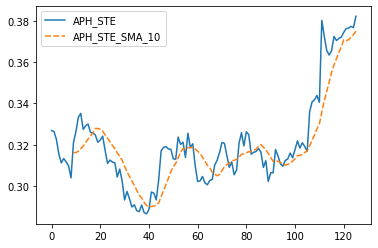

In [285]:
sns.lineplot(data=sma_10_df.iloc[:, 18:21]);

DO NOT CHANGE !

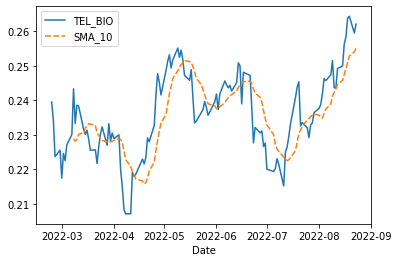

In [97]:
df = pd.read_csv('../../long_short_local/raw_data/cleaned_data.csv')
# convert 'Date' column to datetime values
df['Date'] = pd.to_datetime(df['Date'].str[:10])

test_df = df[['Date', 'TEL_BIO']]
sma10 = pd.DataFrame(ta.sma(test_df["TEL_BIO"], length=10))
tel_bio_df = pd.concat([test_df, sma10], axis=1, ignore_index=False)
tel_bio_df.set_index('Date', inplace=True)
sns.lineplot(data=tel_bio_df);

DO NOT CHANGE !

In [21]:
# convert 'Date' column to datetime values
df['Date'] = pd.to_datetime(df['Date'].str[:10])

In [5]:
# split into 'train' and 'test' data
split_date = df['Date'][41]
df.set_index('Date', inplace=True)
train_df = df.loc[df.index <= split_date].copy()
test_df = df.loc[df.index > split_date].copy()

In [25]:
def create_features(df, label=None):
    df['date'] = df.index
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.weekofyear

    X = df[['hour','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear']]
    if label:
        y = df[label]
        return X, y
    return X

In [26]:
X_train, y_train = create_features(train_df, label='number')

/var/folders/9c/wqkq2b6j16l2hg0gd5_m7sj00000gn/T/ipykernel_9718/3447032744.py:10: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['weekofyear'] = df.index.weekofyear


KeyError: 'number'

In [14]:
X_test, y_test = create_features(test_df, label='number')

KeyError: 'Date'

In [7]:
# build first model
model = XGBRegressor(n_estimators=1000)

In [ ]:
model.fit()